# Tomato Leaf Detection

# Import all dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# path link

In [2]:
path = "../input/tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['valid', 'train']

# Join train and test with path

In [3]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


# glob function

In [4]:
from glob import glob
folders = glob("../input/tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

['../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

Text(0.5, 1.0, 'Bacterial Spot')

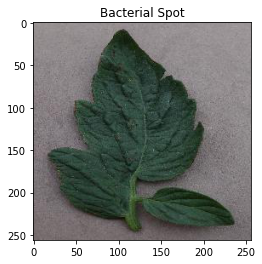

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

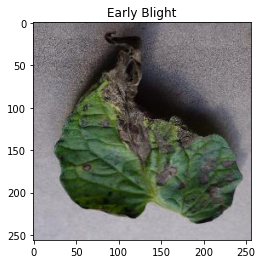

In [6]:
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Late Blight')

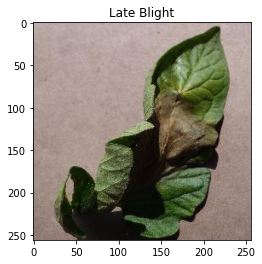

In [7]:
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG"))
plt.title("Late Blight")

# import necessary packages

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# image size

In [9]:
SIZE = [224, 224]

# InceptionV3 with input shape and weight is imagenet

In [10]:
inception = InceptionV3(input_shape=SIZE + [3], weights="imagenet", include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


In [11]:
for layer in inception.layers:
    layer.trainable = False

In [12]:
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folders), activation="softmax")(x)

model_inception = Model(inputs=inception.input, outputs=prediction)

# InceptionV3 model summary

In [14]:
model_inception.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

# Compile model

In [15]:
model_inception.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Data Augmentation

In [16]:
train_datagen_inception = ImageDataGenerator(rescale=1./255,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                            rotation_range= 7)

test_datagen_inception = ImageDataGenerator(rescale=1./255)

In [17]:
trainning_set_inception = train_datagen_inception.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=True)

Found 18345 images belonging to 10 classes.


In [18]:
testing_set_inception = test_datagen_inception.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


# model fit_genrator

In [19]:
import tensorflow as tf



history = model_inception.fit_generator(trainning_set_inception,
                       validation_data=testing_set_inception,
                       epochs=15,
                       steps_per_epoch = len(trainning_set_inception),
                       validation_steps = len(testing_set_inception)                              
                       
                       )

Epoch 1/15
574/574 [==============================] - 320s 557ms/step - loss: 2.8138 - accuracy: 0.6785 - val_loss: 2.9412 - val_accuracy: 0.7204
Epoch 2/15
574/574 [==============================] - 226s 394ms/step - loss: 2.1791 - accuracy: 0.7846 - val_loss: 2.2017 - val_accuracy: 0.7930
Epoch 3/15
574/574 [==============================] - 228s 396ms/step - loss: 2.0685 - accuracy: 0.8198 - val_loss: 2.1141 - val_accuracy: 0.8159
Epoch 4/15
574/574 [==============================] - 229s 398ms/step - loss: 1.9911 - accuracy: 0.8384 - val_loss: 2.2040 - val_accuracy: 0.8297
Epoch 5/15
574/574 [==============================] - 229s 398ms/step - loss: 1.9801 - accuracy: 0.8499 - val_loss: 2.3960 - val_accuracy: 0.8270
Epoch 6/15
574/574 [==============================] - 227s 395ms/step - loss: 1.8820 - accuracy: 0.8596 - val_loss: 2.9076 - val_accuracy: 0.8220
Epoch 7/15
574/574 [==============================] - 223s 389ms/step - loss: 1.8714 - accuracy: 0.8757 - val_loss: 3.5402 -

# Visualization for InceptionV3

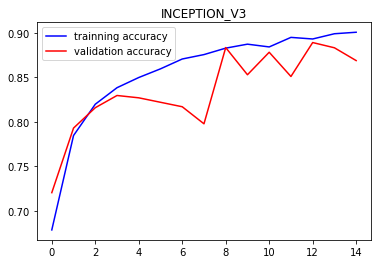

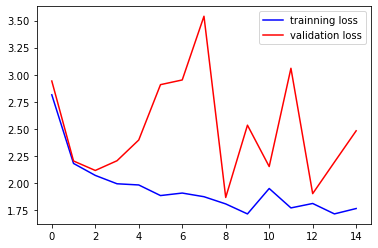

In [23]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.title("INCEPTION_V3")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [24]:
y_pred = model_inception.predict(testing_set_inception)

In [25]:
y_pred

array([[1.0000000e+00, 1.5083347e-09, 7.2272769e-17, ..., 6.4693162e-20,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0265706e-12, 6.0191389e-16, ..., 5.0223562e-30,
        0.0000000e+00, 0.0000000e+00],
       [9.9742836e-01, 8.9520847e-12, 2.7961313e-29, ..., 7.8248517e-29,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.4562163e-33, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [26]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 9, 9, 9])

# Tomato Bacterial Spot

In [27]:
test_img = plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")

# Visualize

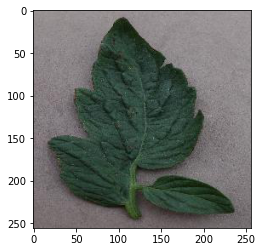

In [28]:
plt.imshow(test_img)

# Save model

In [31]:
from tensorflow.keras.models import Sequential, Model
# Save the model
model_inception.save('Tomato-Model.h5')  # Saves the model to a HDF5 file

# load a image and detection

In [37]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model('Tomato-Model.h5')

# prediction

# Class Dictionary

In [38]:
class_dict = trainning_set_inception.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

# label

In [39]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [40]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0a334ae6-bea3-4453-b200-85e082794d56___GH_HL Leaf 310.1_flipTB.JPG")])
prediction_cls(prediction)

'Tomato___healthy'

In [41]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/101849ce-d61a-4c2f-a6a7-8da0d71f237e___YLCV_NREC 2725.JPG")])

prediction_cls(prediction)

'Tomato___Late_blight'